In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display


from tyssue import Sheet, SheetGeometry as geom
from tyssue import Monolayer, config
from tyssue.io import hdf5
from tyssue.draw.threejs_draw import view_3js
from tyssue.draw.plt_draw import quick_edge_draw
%matplotlib inline

In [2]:
dsets = hdf5.load_datasets('../data/hf5/ellipsoid_sheet.hf5',
                           data_names=['vert', 'edge', 'face'])

ellipsoid_sheet = Sheet('ellipse', dsets,
                        config.geometry.rod_sheet())

fig, ax = quick_edge_draw(ellipsoid_sheet, coords=list('zx'))

{'ab': [0.0, 0.0], 'geometry': 'rod', 'height_axis': 'z'}

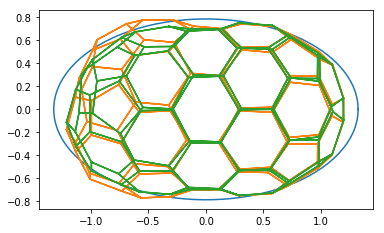

In [4]:
def to_spherical(sheet):
    
    sheet.vert_df['r'] = np.linalg.norm(sheet.vert_df[sheet.coords],
                                        axis=1)
    sheet.vert_df['theta'] = sheet.vert_df.eval('arccos(z/r)')
    sheet.vert_df['phi'] = np.arctan2(sheet.vert_df['y'],
                                      sheet.vert_df['x'])

def fit_ellipsoid(sheet):
    
    rho = np.linalg.norm(sheet.vert_df[sheet.coords],
                                        axis=1)
    theta = np.arccos(sheet.vert_df['z']/rho)
    u = rho * np.cos(theta)
    v = rho * np.sin(theta)
    poly = np.polyfit(u**2, v**2, deg=1)

    b = np.sqrt(poly[1])
    a = np.sqrt(-poly[1]/poly[0])
    return a, b

to_spherical(ellipsoid_sheet)

a, b = fit_ellipsoid(ellipsoid_sheet)

fig, ax = plt.subplots()
theta = np.linspace(0, 2*np.pi, 100)

ax.plot(a * np.cos(theta), b * np.sin(theta))

fig, ax = quick_edge_draw(ellipsoid_sheet, list('zx'), ax=ax)
fig, ax = quick_edge_draw(ellipsoid_sheet, list('zy'), ax=ax)



### Pseudo ellipsis (i.e rod)

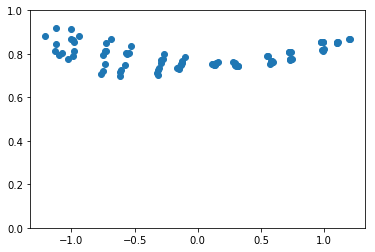

In [5]:
from tyssue import SheetGeometry

SheetGeometry.update_all(ellipsoid_sheet)

ellipsoid_sheet.vert_df.rho.mean()

fig, ax = plt.subplots()
ax.plot(ellipsoid_sheet.vert_df.z, ellipsoid_sheet.vert_df.rho, 'o')
ax.set_ylim(0, 1);

In [6]:
rdr, lines = view_3js(ellipsoid_sheet)
rdr